In [24]:
import pandas as pd
import geopandas as gpd
import os
import matplotlib as plt
from shapely.geometry import Point

In [27]:
datapath = r'/home/james/Documents/SDG_11.2.1/SDG_11.2.1/data'

In [28]:
stops_df = pd.read_csv(os.path.join(datapath,'Stops.txt'), delimiter='\t')
stops_df.sample(15)


,stop_id,stop_code,stop_name,stop_lat,stop_lon,stop_url,vehicle_type
225827,390010149,sufadmag,"Long Melford, Library (Adjacent)",52.07519,0.71637,NaN,3.0
225237,3890D037901,stoajaga,"Heron Cross, The Locomotive (opp)",52.99379,-2.16116,NaN,3.0
356474,6280000014,64326839,"Newtonloan Toll, Ramsay Cottages (at)",55.85857,-3.07313,NaN,3.0
362468,6400PT1158,36323845,"Fairmuir, Graham Street (at)",56.47751,-2.96979,NaN,3.0
247174,4200F054900,wardgadp,"Rowington, Church (Adj)",52.32219,-1.70428,NaN,3.0
87563,1600GLS885,gloamgaj,"Purton, Riddle Street (NW-bound)",51.72836,-2.44191,NaN,3.0
206754,3600SOB20878,sotawjmt,"Street, Brookside School (opp)",51.11621,-2.74852,NaN,3.0
358792,630041282,23626237,"Stonehaven, Library (E bound)",56.96379,-2.21109,NaN,3.0
7159,021013451,ahladjma,"Dunstable, Turnpike Farm (opp)",51.86588,-0.48856,NaN,3.0
224360,3890D003301,stoadgmj,"Hanley, Ivy House Road (opp)",53.02491,-2.15957,NaN,3.0


In [92]:

def make_geo_df(df,col_x, col_y):
    crs = '27700'
    geometry = [Point(xy) for xy in zip(df[col_x], df[col_y])]
    geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)
    return geo_df

In [93]:
stops_geo_df = make_geo_df(stops_df,'stop_lon','stop_lat',)

In [94]:
stops_geo_df.crs

'27700'

In [95]:
stops_geo_df.sample(10)

,stop_id,stop_code,stop_name,stop_lat,stop_lon,stop_url,vehicle_type,geometry
210874,370020088,37020088,"Wybourn, Maltravers Place (adj)",53.38192,-1.44434,NaN,3.0,POINT (-1.44434 53.38192)
363872,64802037,73723534,"Perth, Rosslyn House (opp)",56.39577,-3.44821,NaN,3.0,POINT (-3.44821 56.39577)
132412,230000007730,iowgjgm,"Shide, West Standen (Adjacent)",50.68568,-1.28867,NaN,3.0,POINT (-1.28867 50.68568)
281464,450027831,45027831,"Birstall, Lowood Lane Rochester Rd (opp)",53.74027,-1.65526,NaN,3.0,POINT (-1.65526 53.74027)
310629,5110AWD71931,dbgawtw,"Rhos, Foxes Hollow",53.14109,-3.31205,NaN,3.0,POINT (-3.31205 53.14109)
118334,2000G323901,wocgtdwt,"Bordesley, Windsor Heights (opp)",52.31493,-1.94339,NaN,3.0,POINT (-1.94339 52.31493)
109090,1900HA020414,hamgtjmw,"Blacknest, Cross Roads (NE-bound)",51.16745,-0.85954,NaN,3.0,POINT (-0.85954 51.16745)
106926,1900HA080710,hamagmjt,"Hordle, Lawn Mower Shop (S-bound)",50.75369,-1.60840,NaN,3.0,POINT (-1.60840 50.75369)
251220,43000282502,nwmgjmgm,"Handsworth, Wattville Rd (adj)",52.50771,-1.95284,NaN,3.0,POINT (-1.95284 52.50771)
279689,450024842,45024842,"Birkby, Grimscar Avenue Bromley Rd",53.66190,-1.79405,NaN,3.0,POINT (-1.79405 53.66190)


In [96]:
# Building the map of london

map_data_path = r'/home/james/Documents/SDG_11.2.1/SDG_11.2.1/data/Local Authority Districts (December 2017) Generalised Clipped Boundaries in United Kingdom (WGS84)'

map_df = gpd.read_file(os.path.join(map_data_path,'Local_Authority_Districts_December_2017_Generalised_Clipped_Boundaries_in_United_Kingdom_WGS84.shp'))

# OA_2011_London_gen_MHW.shp'

In [109]:
map_df[map_df['lad17nm']=='Islington']


,objectid,lad17cd,lad17nm,lad17nmw,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry
186,312,E09000019,Islington,None,531158,184647,-0.10992,51.5455,0.001923,0.235052,"POLYGON ((-0.11920 51.57465, -0.11879 51.57433..."


In [110]:
lad17_sort = map_df.sort_values('lad17cd')
lad17_sort

,objectid,lad17cd,lad17nm,lad17nmw,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry
0,1,E06000001,Hartlepool,None,447157,531476,-1.27023,54.6762,0.013038,0.879442,"MULTIPOLYGON (((-1.27185 54.72727, -1.26982 54..."
1,2,E06000002,Middlesbrough,None,451141,516887,-1.21099,54.5447,0.007482,0.535700,"MULTIPOLYGON (((-1.23162 54.58423, -1.23176 54..."
2,3,E06000003,Redcar and Cleveland,None,464359,519597,-1.00611,54.5675,0.034006,1.266696,"MULTIPOLYGON (((-1.13879 54.64706, -1.14035 54..."
3,4,E06000004,Stockton-on-Tees,None,444937,518183,-1.30669,54.5569,0.028472,1.424065,"MULTIPOLYGON (((-1.31934 54.64536, -1.31873 54..."
7,5,E06000005,Darlington,None,428029,515649,-1.56835,54.5354,0.027429,1.316797,"POLYGON ((-1.63955 54.61732, -1.63922 54.61682..."
...,...,...,...,...,...,...,...,...,...,...,...
365,387,W06000020,Torfaen,Torfaen,327459,200480,-3.05101,51.6984,0.016415,0.928731,"POLYGON ((-3.10724 51.79591, -3.09763 51.79198..."
366,388,W06000021,Monmouthshire,Sir Fynwy,337812,209231,-2.90280,51.7783,0.110743,2.590624,"MULTIPOLYGON (((-3.05343 51.97335, -3.05270 51..."
389,389,W06000022,Newport,Casnewydd,337897,187433,-2.89769,51.5823,0.024711,1.793746,"MULTIPOLYGON (((-2.83569 51.64869, -2.83582 51..."
390,390,W06000023,Powys,Powys,302328,273254,-3.43533,52.3486,0.685026,7.099033,"POLYGON ((-3.15615 52.89838, -3.15655 52.89779..."


In [111]:
lad17_sort_ind = lad17_sort.set_index('lad17cd')

In [112]:
london_lads = lad17_sort_ind.loc['E09000001':'E09000031']

In [113]:
london_lads.head()

,objectid,lad17nm,lad17nmw,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry
lad17cd,,,,,,,,,,
E09000001,294,City of London,None,532382,181358,-0.093510,51.5156,0.000375,0.109874,"POLYGON ((-0.09840 51.52383, -0.09808 51.52333..."
E09000002,295,Barking and Dagenham,None,547759,185107,0.129506,51.5455,0.004678,0.458291,"MULTIPOLYGON (((0.14651 51.59727, 0.14642 51.5..."
E09000003,296,Barnet,None,523472,191753,-0.218210,51.6111,0.011265,0.578050,"POLYGON ((-0.20063 51.66869, -0.19824 51.66863..."
E09000004,297,Bexley,None,549202,175433,0.146212,51.4582,0.007835,0.509826,"MULTIPOLYGON (((0.14226 51.50824, 0.14579 51.5..."
E09000005,298,Brent,None,519615,186468,-0.275680,51.5644,0.005603,0.456380,"POLYGON ((-0.26875 51.60087, -0.26136 51.59467..."


In [114]:
#  checking if the CRS is the same in each DF. 

london_lads.crs == stops_geo_df.crs 

#  they are not the same

False

In [115]:
#  Checking the CRS of Stops
stops_geo_df.crs

'27700'

In [107]:
#  Checking the CRS of London_lads
london_lads.crs

{'init': 'epsg:4326'}

In [116]:
# Changing the CRS of london_lads to 27700
# london_lads.to_crs(epsg=27700)
# stops_geo_df.crs = 'epsg:27700'

# epsg:27700


In [52]:
# Wandsworth_034B_df = map_df[map_df['LSOA11NM']=='Wandsworth 034B']

In [53]:
k_u_thames = map_df[map_df['NAME']=='Kingston upon Thames']
k_u_thames.geometry

0    POLYGON ((516401.600 160201.800, 516407.300 16...
Name: geometry, dtype: geometry

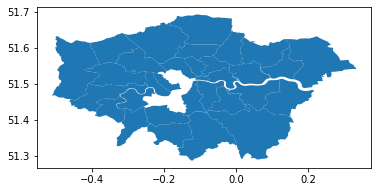

In [117]:
london_lads.plot()

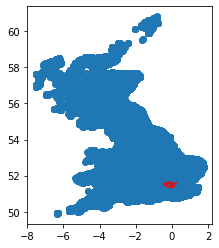

In [120]:
fig, ax = plt.pyplot.subplots()

# _ = Wandsworth_034B_df.plot(ax=ax, facecolor='red')
# _ = k_u_thames.plot(ax=ax, facecolor='red')
_ = stops_geo_df.plot(ax=ax)
_ = london_lads.plot(ax=ax, facecolor='red')